In [1]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] Tesla V100-SXM2-16GB
    • Total memory: 15.8 GB
    • Compute capability: 7.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.2rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



In [1]:
!wget https://datasets.cellxgene.cziscience.com/51007192-dc1e-4718-b48c-dbf35e8216f7.h5ad -O data/Cross_tissue_immune.h5ad


--2025-06-08 20:55:45--  https://datasets.cellxgene.cziscience.com/51007192-dc1e-4718-b48c-dbf35e8216f7.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 3.168.86.114, 3.168.86.16, 3.168.86.94, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|3.168.86.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3045758089 (2.8G) [binary/octet-stream]
Saving to: ‘data/Cross_tissue_immune.h5ad’

100%[====================================>] 3,045,758,089 56.9MB/s   in 48s    

2025-06-08 20:56:33 (60.3 MB/s) - ‘data/Cross_tissue_immune.h5ad’ saved [3045758089/3045758089]



In [2]:
adata = sc.read(
    'data/Cross_tissue_immune.h5ad',
)
adata

AnnData object with n_obs × n_vars = 329762 × 36398
    obs: 'donor_id', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'sex_ontology_term_id_colors', 'title'
    obsm: 'X_umap'

In [5]:
len(adata.obs['Predicted_labels_CellTypist'].unique())

91

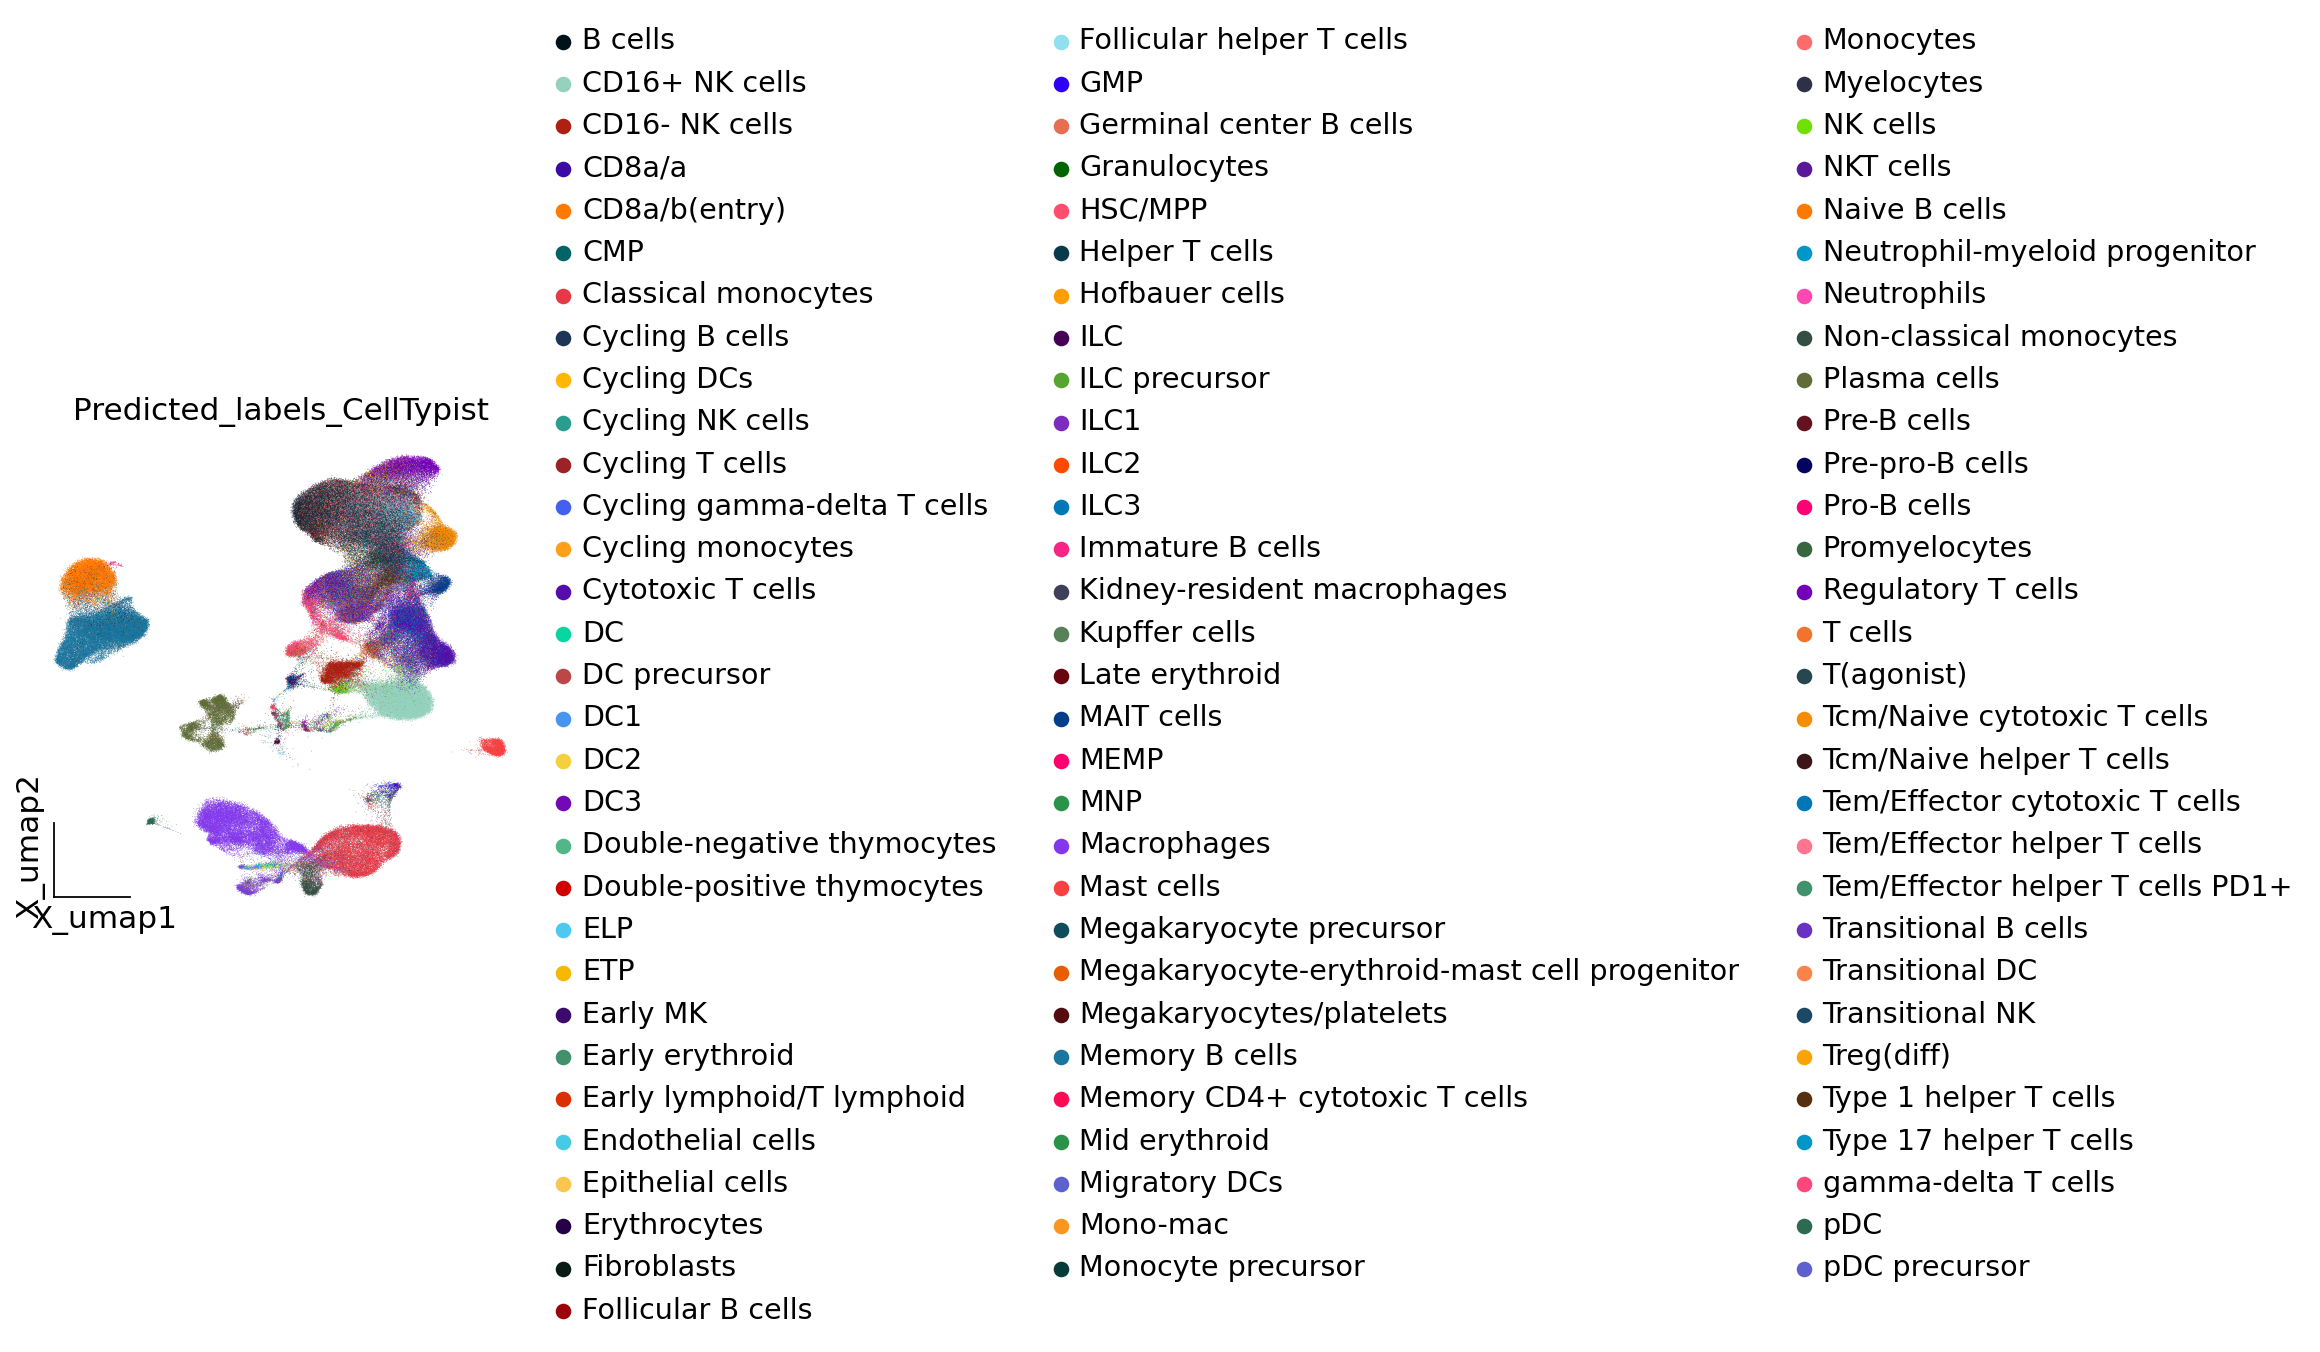

In [6]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['Predicted_labels_CellTypist'],
    wspace=0.55,
    ncols=1
)

In [12]:
# 
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    local_model_dir="./my_models"
)

🔨 Creating ontology resources from OBO file...
📖 Parsing ontology file...
🧠 Creating NLP embeddings...
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🔄 Encoding 16841 ontology labels...


Batches:   0%|          | 0/527 [00:00<?, ?it/s]

💾 Embeddings saved to: new_ontology/ontology_embeddings.pkl
📋 Ontology mappings included: 16841 cell types
✓ Ontology resources creation completed!


In [7]:
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    embeddings_path='new_ontology/ontology_embeddings.pkl',
    local_model_dir="./my_models"
)

📥 Loading existing ontology embeddings...
📥 Loaded embeddings for 16841 ontology labels
📋 Ontology mappings loaded: 16841 cell types


In [8]:

mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="Cross-tissue",    # 组织上下文
    species="Homo sapiens",                   # 物种信息
    study_context="Cross-tissue immune cell analysis reveals tissue-specific features in humans",
    api_key="sk-*"
)
mapper.load_cell_taxonomy_resource("new_ontology/Cell_Taxonomy_resource.txt", 
                                   species_filter=["Homo sapiens", "Mus musculus"])


✓ Loaded 16 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: Cross-tissue
🔬 Study context: Cross-tissue immune cell analysis reveals tissue-specific features in humans
🐭 Species: Homo sapiens
📊 Loading Cell Taxonomy resource from: new_ontology/Cell_Taxonomy_resource.txt
✓ Loaded 226222 taxonomy entries
🐭 Filtered by species ['Homo sapiens', 'Mus musculus']: 224736/226222 entries
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🧠 Creating embeddings for 2540 taxonomy cell types...


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

✓ Created taxonomy embeddings for 2540 cell types
📈 Species distribution:
  🐭 Mus musculus: 141727 entries
  🐭 Homo sapiens: 83009 entries
🧬 Unique cell types: 2540
🎯 Unique markers: 25818


True

In [9]:
mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="Cross-tissue",    # 组织上下文
    species="Homo sapiens",                   # 物种信息
    study_context="Cross-tissue immune cell analysis reveals tissue-specific features in humans",
    api_key="sk-*"
)

✓ Loaded 16 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: Cross-tissue
🔬 Study context: Cross-tissue immune cell analysis reveals tissue-specific features in humans
🐭 Species: Homo sapiens


True

In [10]:
enhanced_results = mapper.map_adata_with_taxonomy(
    adata, 
    cell_name_col="Predicted_labels_CellTypist",
    new_col_name="enhanced_cell_ontology",
    expand_abbreviations=True,
    use_taxonomy=True,
    species="Homo sapiens",
    tissue_context="Cross-tissue",
    threshold=0.3,
)

📊 Using 91 unique cell names from column 'Predicted_labels_CellTypist'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: Cross-tissue
🔬 Using study context: Cross-tissue immune cell analysis reveals tissue-specific features in humans
🐭 Species: Homo sapiens
  🔤 Identified potential abbreviation: CD8a/a
  🔤 Identified potential abbreviation: ILC3
  🔤 Identified potential abbreviation: ELP
  🔤 Identified potential abbreviation: DC2
  🔤 Identified potential abbreviation: DC1
  🔤 Identified potential abbreviation: ETP
  🔤 Identified potential abbreviation: pDC
  🔤 Identified potential abbreviation: MNP
  🔤 Identified potential abbreviation: DC
  🔤 Identified potential abbreviation: Treg(diff)
  🔤 Identified potential abbreviation: HSC/MPP
  🔤 Identified potential abbreviation: ILC1
  🔤 Identified potential abbreviation: MEMP
  🔤 Identified potential abbreviation: ILC
  🔤 Identified potential abbreviation: Mono-mac
  🔤 Identified potential abbreviation: GMP

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

  🤖 [1/91] LLM selecting for: Type 17 helper T cells
    ✓ LLM selected: T-helper 17 cell (rank 1, sim: 0.755)
    💡 Reasoning: The term 'T-helper 17 cell' is the most biologically accurate and widely accepted nomenclature for t...
  🤖 [2/91] LLM selecting for: Cytotoxic T cells
    ✓ LLM selected: cytotoxic T cell (rank 2, sim: 0.763)
    💡 Reasoning: The term 'cytotoxic T cell' is the most biologically accurate and widely recognized cell type that a...
  🤖 [3/91] LLM selecting for: Tem/Effector cytotoxic T cells
    ✓ LLM selected: effector T cell (rank 4, sim: 0.681)
    💡 Reasoning: Effector T cells are a biologically accurate and broadly applicable term that encompasses cytotoxic ...
  🤖 [4/91] LLM selecting for: gamma-delta T cells
    ✓ LLM selected: cycling gamma-delta T cell (rank 1, sim: 0.790)
    💡 Reasoning: The study context involves cross-tissue immune cell analysis, which likely includes dynamic immune c...
  🤖 [5/91] LLM selecting for: Macrophages
    ✓ LLM selected: t

In [13]:
adata.obs.to_csv('data/Cross-tissue_anno.csv')

In [3]:
adata.obs=ov.read('data/Cross-tissue_anno.csv',index_col=0)

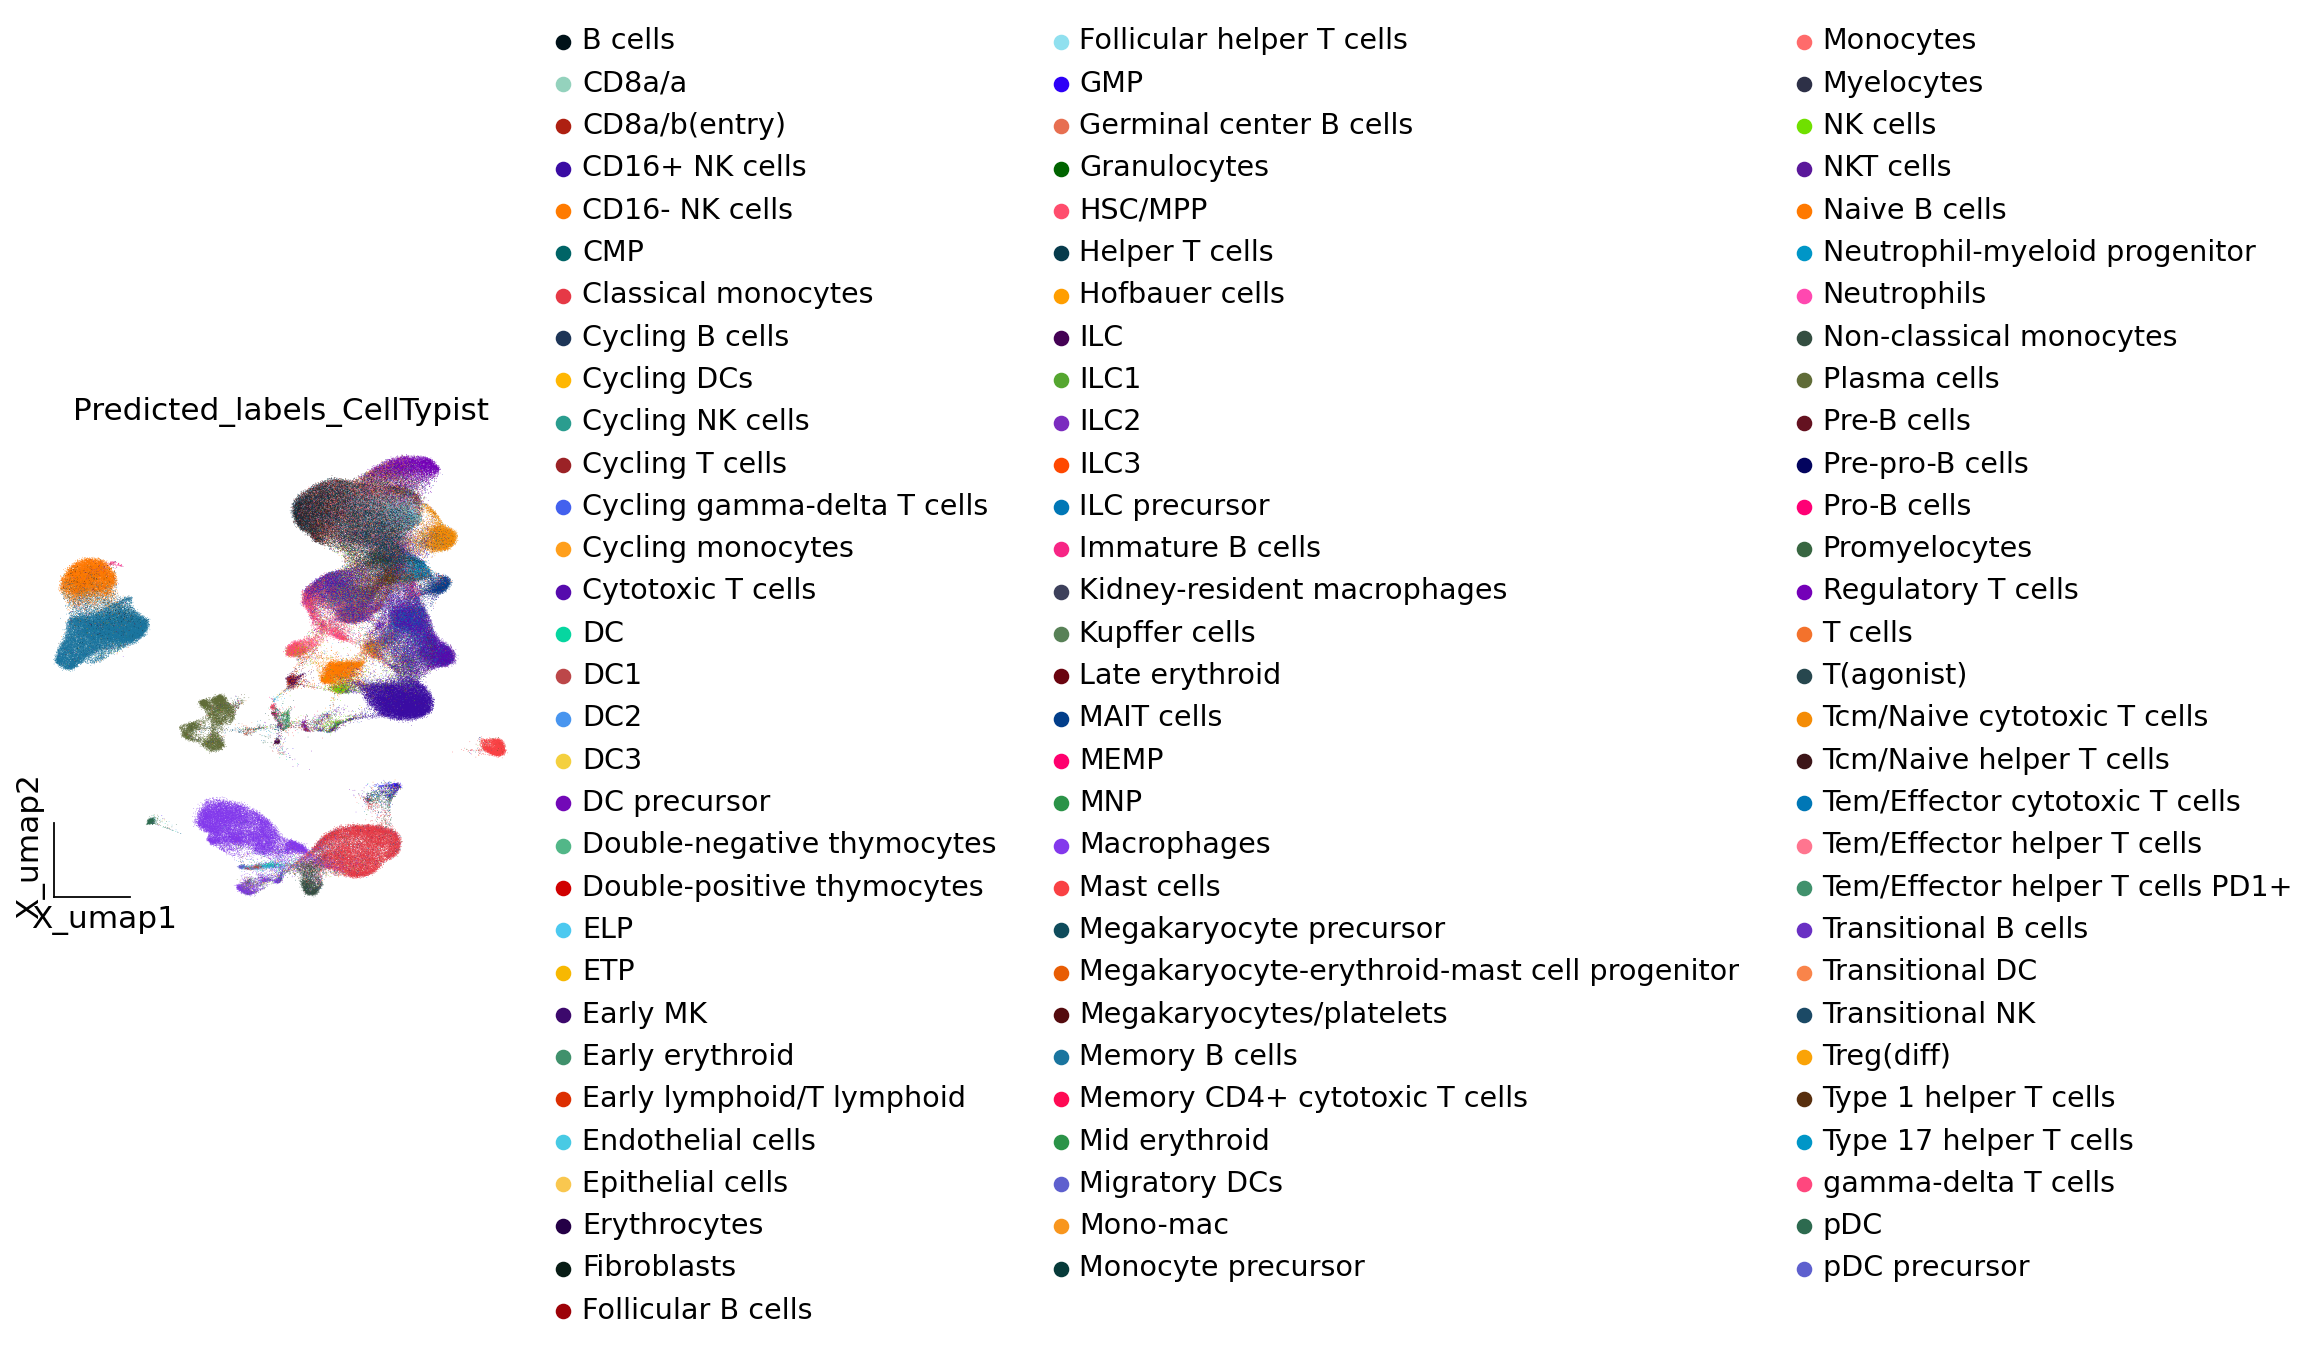

In [4]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['Predicted_labels_CellTypist'],
    wspace=0.55,
    ncols=1,
    
)

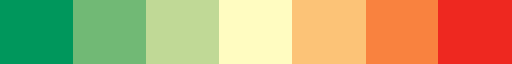

In [5]:
import colormaps as cmaps
cmaps.drought_severity

In [6]:
import matplotlib.colors as mcolors

def rgba_list_to_hex(colors, include_alpha=False):
    """
    把一系列 RGBA 元组转换成 HTML 十六进制颜色值。
    
    参数：
      colors: Iterable of (r, g, b, a) tuples, each in [0, 1]
      include_alpha: bool, 是否在输出中包含 alpha 通道
    
    返回：
      List of strings, 如 ['#RRGGBB', …] 或 ['#RRGGBBAA', …]
    """
    hex_list = []
    for rgba in colors:
        # matplotlib 的 to_hex 自动处理 RGB，也能加透明度
        hex_code = mcolors.to_hex(rgba, keep_alpha=include_alpha)
        hex_list.append(hex_code)
    return hex_list

# 示例用法
from colormaps.colormap import Colormap
cmap = Colormap([(1,0,0,1), (0,1,0,0.5), (0,0,1,1)], name='mylist')

# 只要 RGB
html_colors = rgba_list_to_hex(cmap.colors)
print(html_colors)
# 输出: ['#FF0000', '#00FF00', '#0000FF']

# 要包含 alpha 通道
html_colors_with_alpha = rgba_list_to_hex(cmap.colors, include_alpha=True)
print(html_colors_with_alpha)
# 输出: ['#FF0000FF', '#00FF0080', '#0000FFFF']


['#ff0000', '#00ff00', '#0000ff']
['#ff0000ff', '#00ff0080', '#0000ffff']


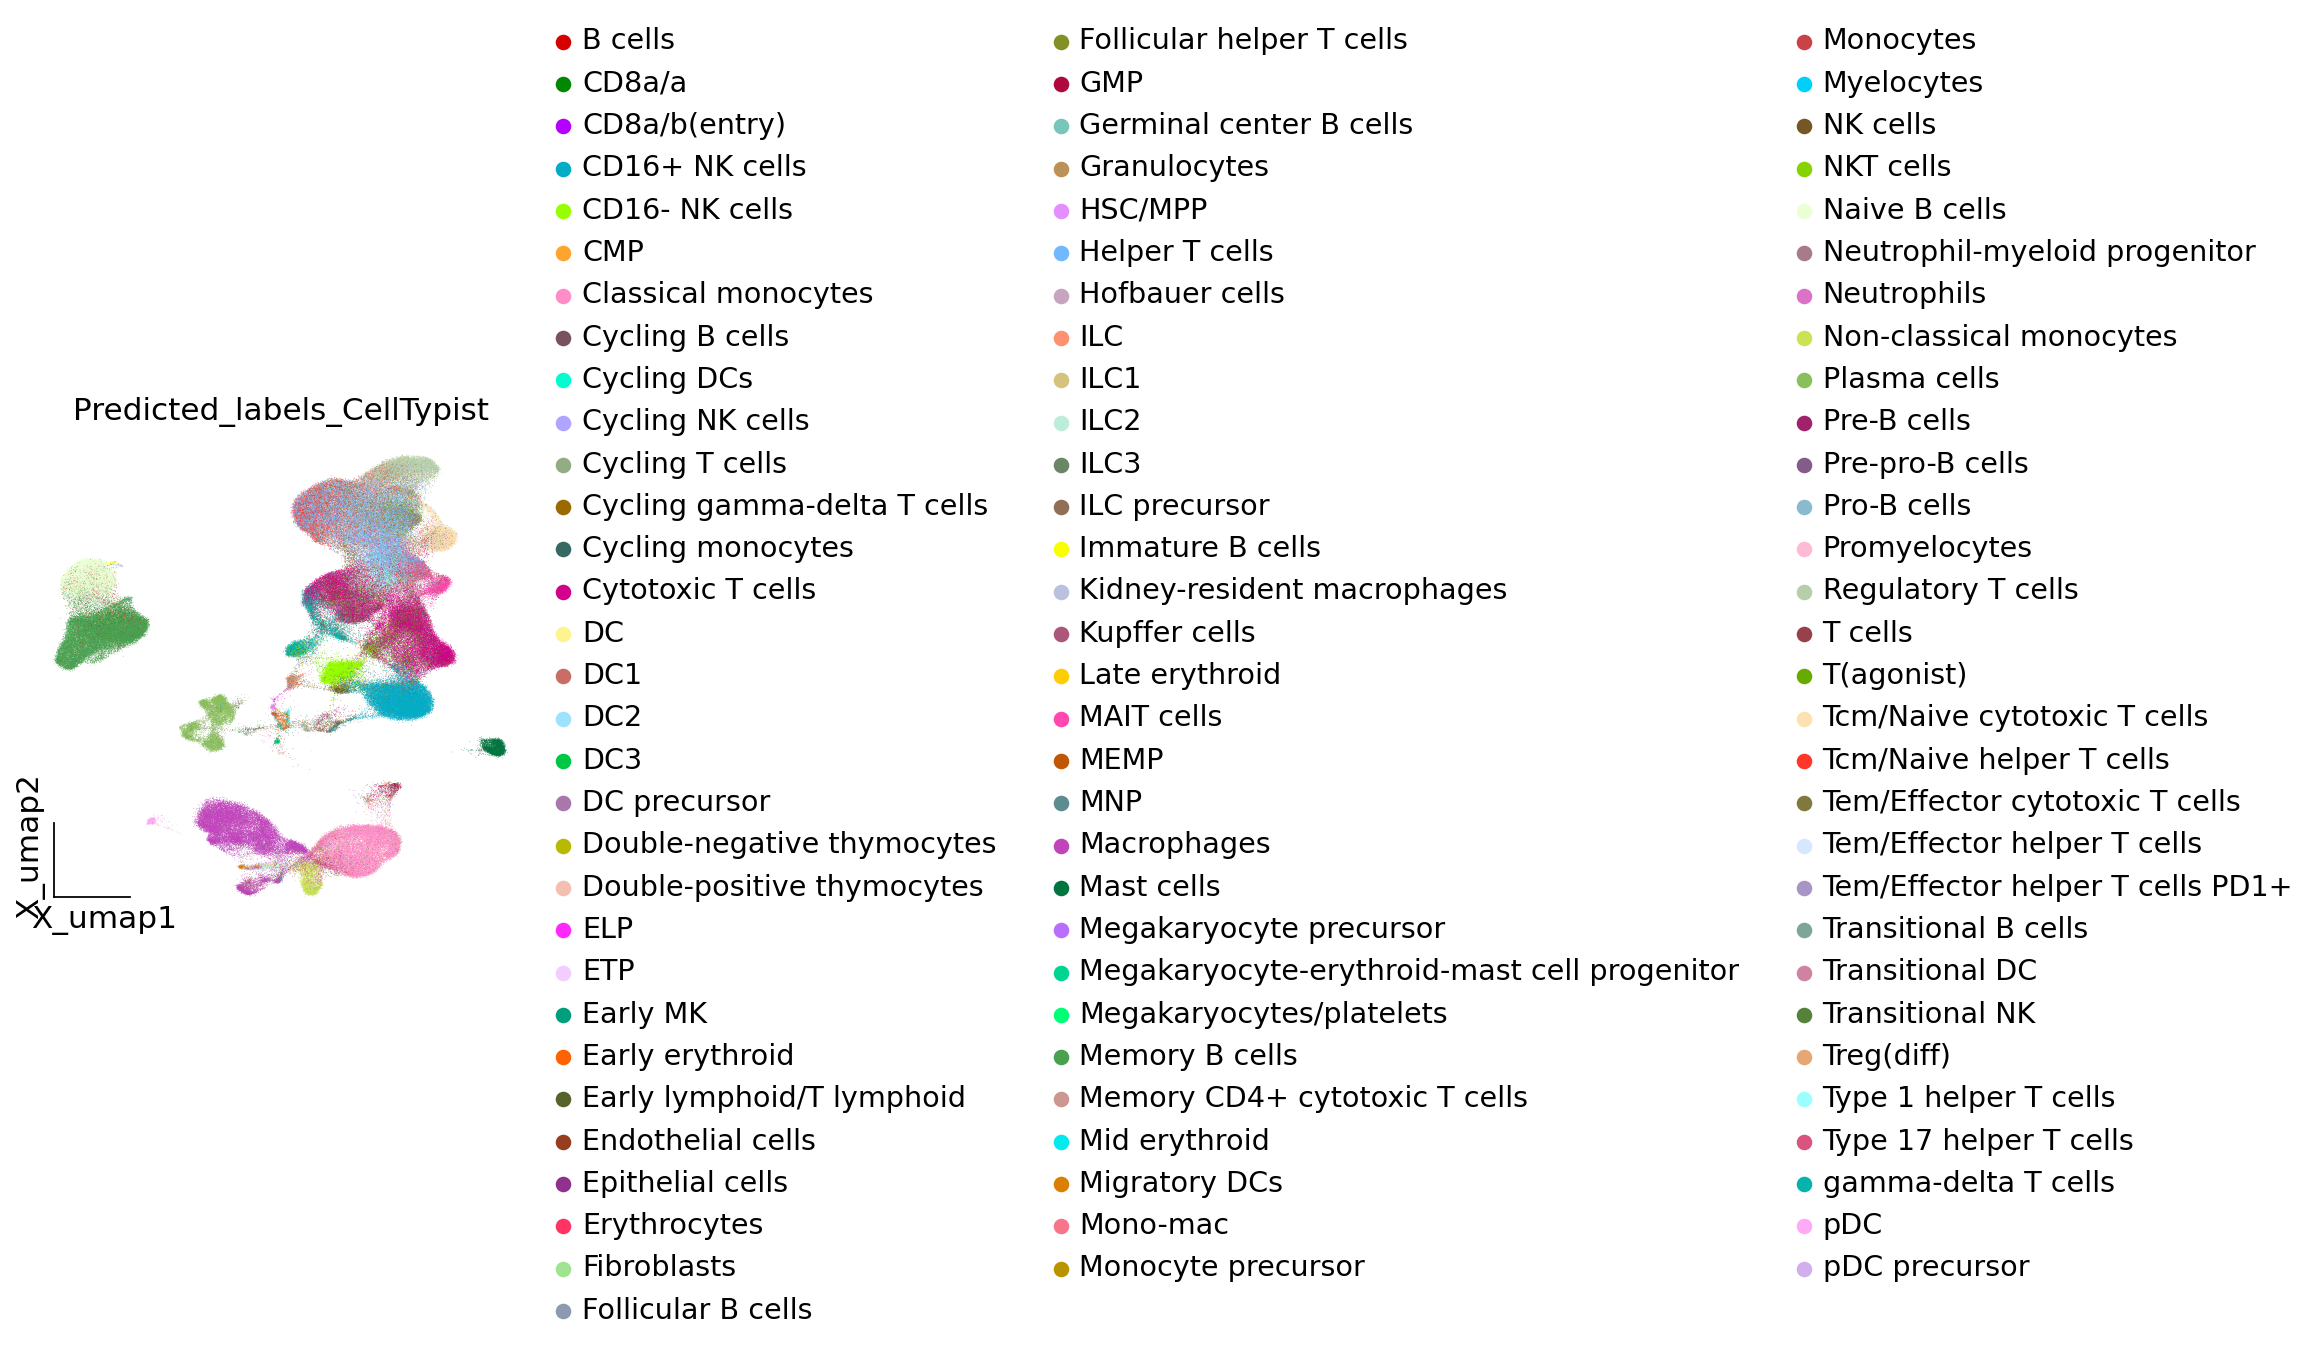

In [7]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['Predicted_labels_CellTypist'],
    palette=rgba_list_to_hex(cmaps.cet_g_bw_minc_minl.colors),
    wspace=0.55,
    ncols=1
)

In [8]:
type_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'],
    adata.obs['enhanced_cell_ontology_taxonomy_match'],
))

In [9]:
color_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'].cat.categories,
    adata.uns['Predicted_labels_CellTypist_colors'],
))

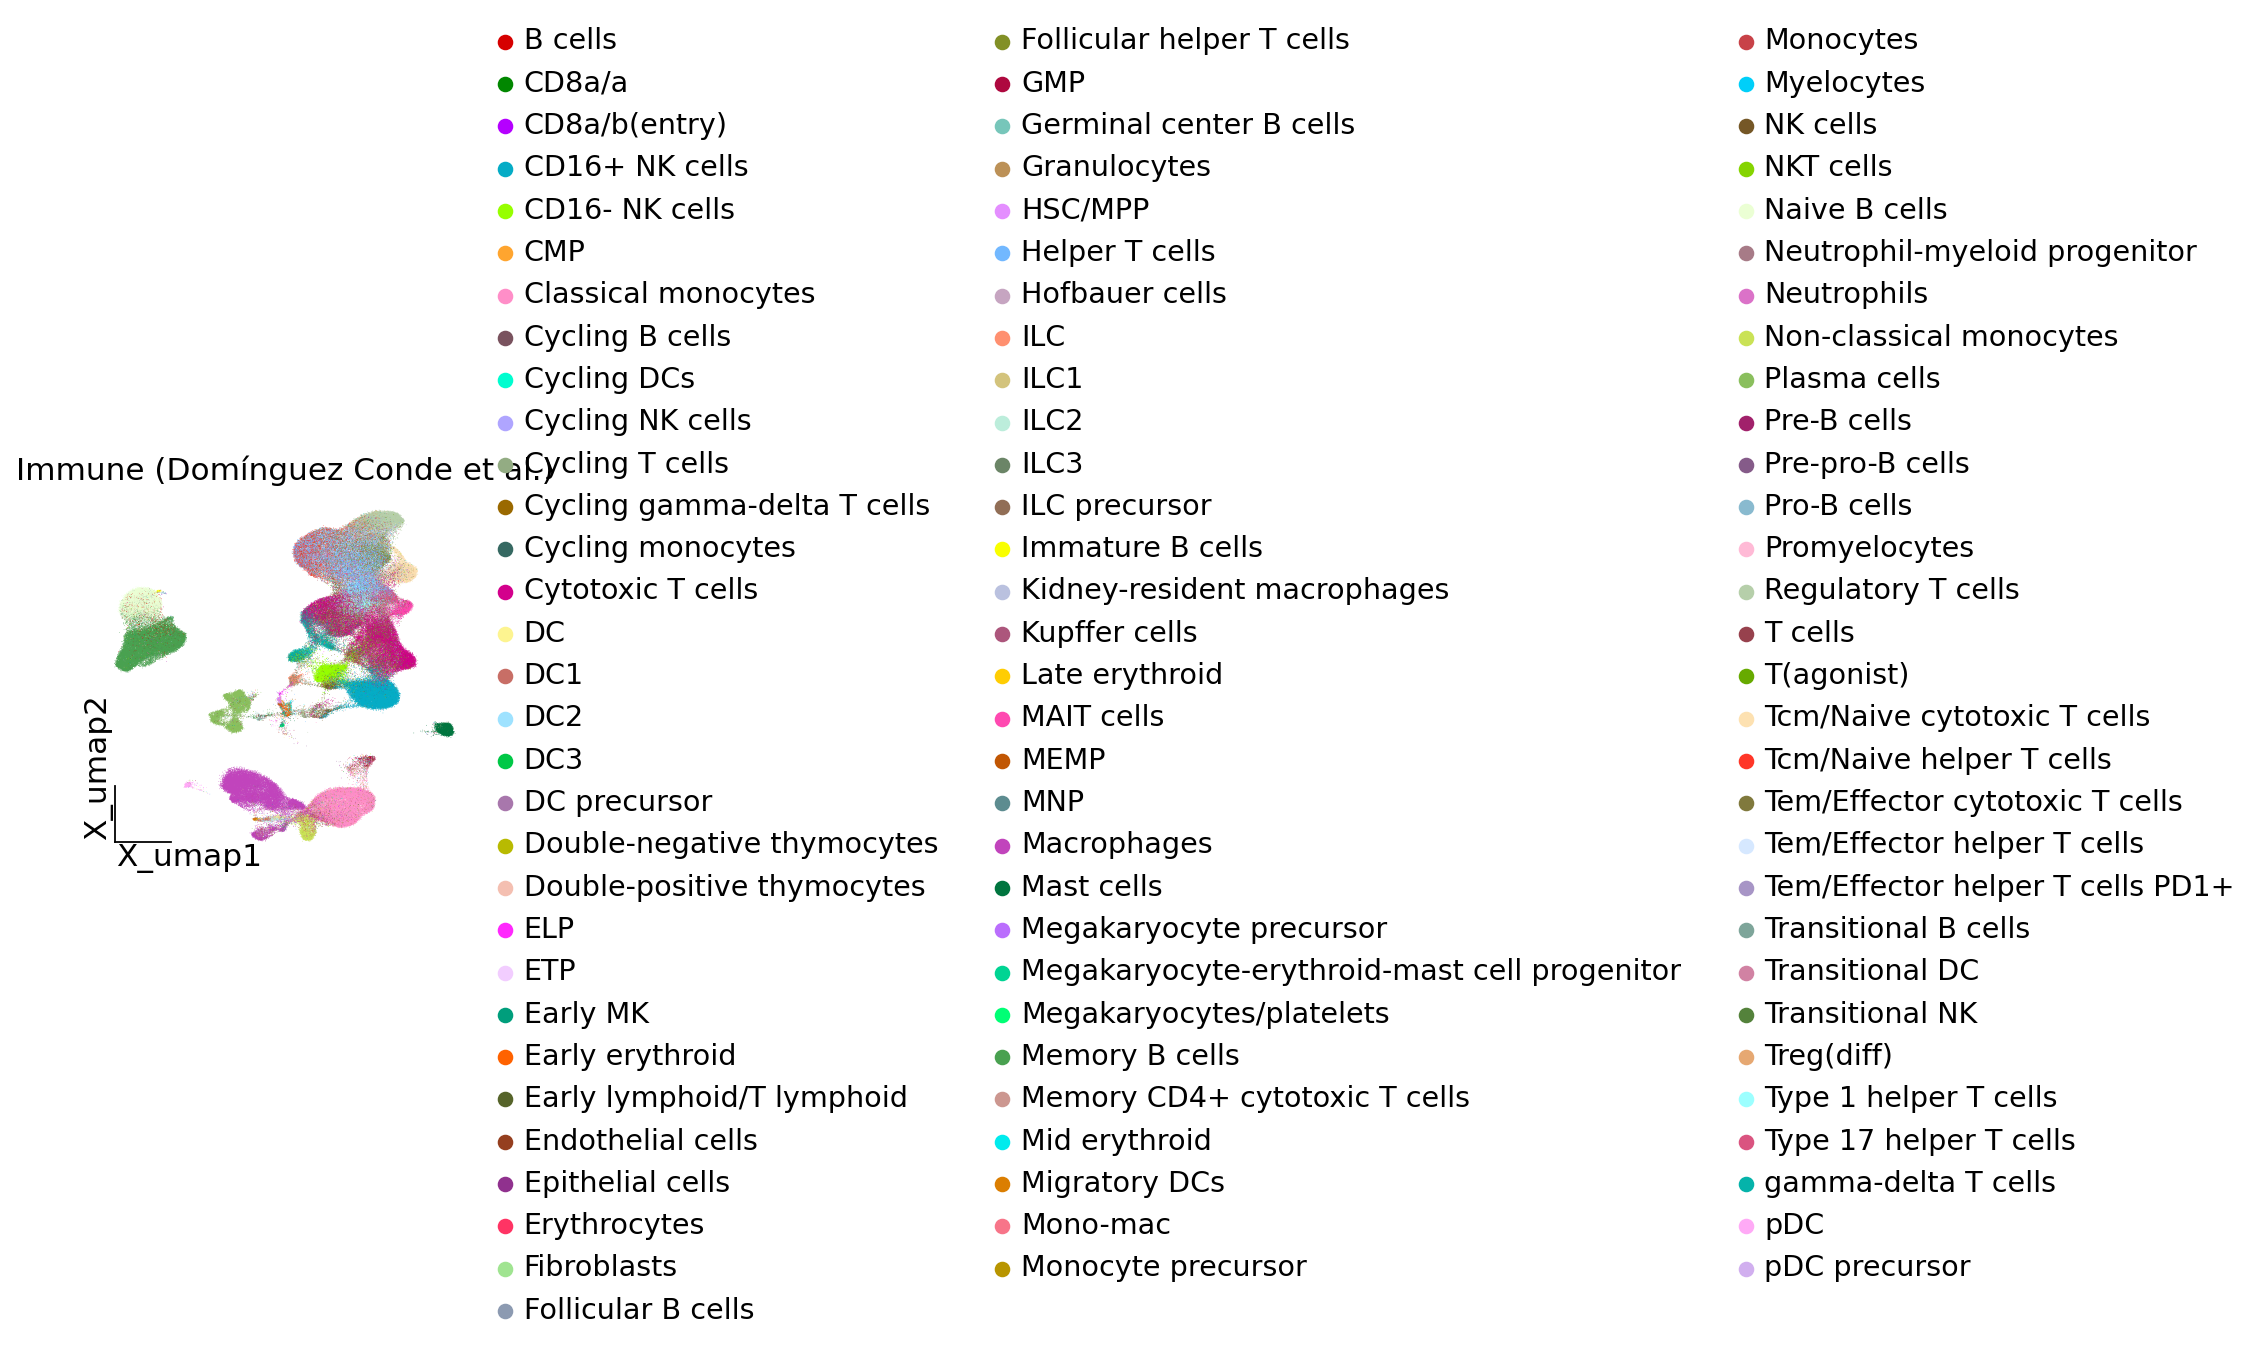

In [10]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='Predicted_labels_CellTypist',
    title='Immune (Domínguez Conde et al.)',
    show=False,
    palette=color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-immune-author-33.png',dpi=300,bbox_inches='tight')

In [11]:
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict

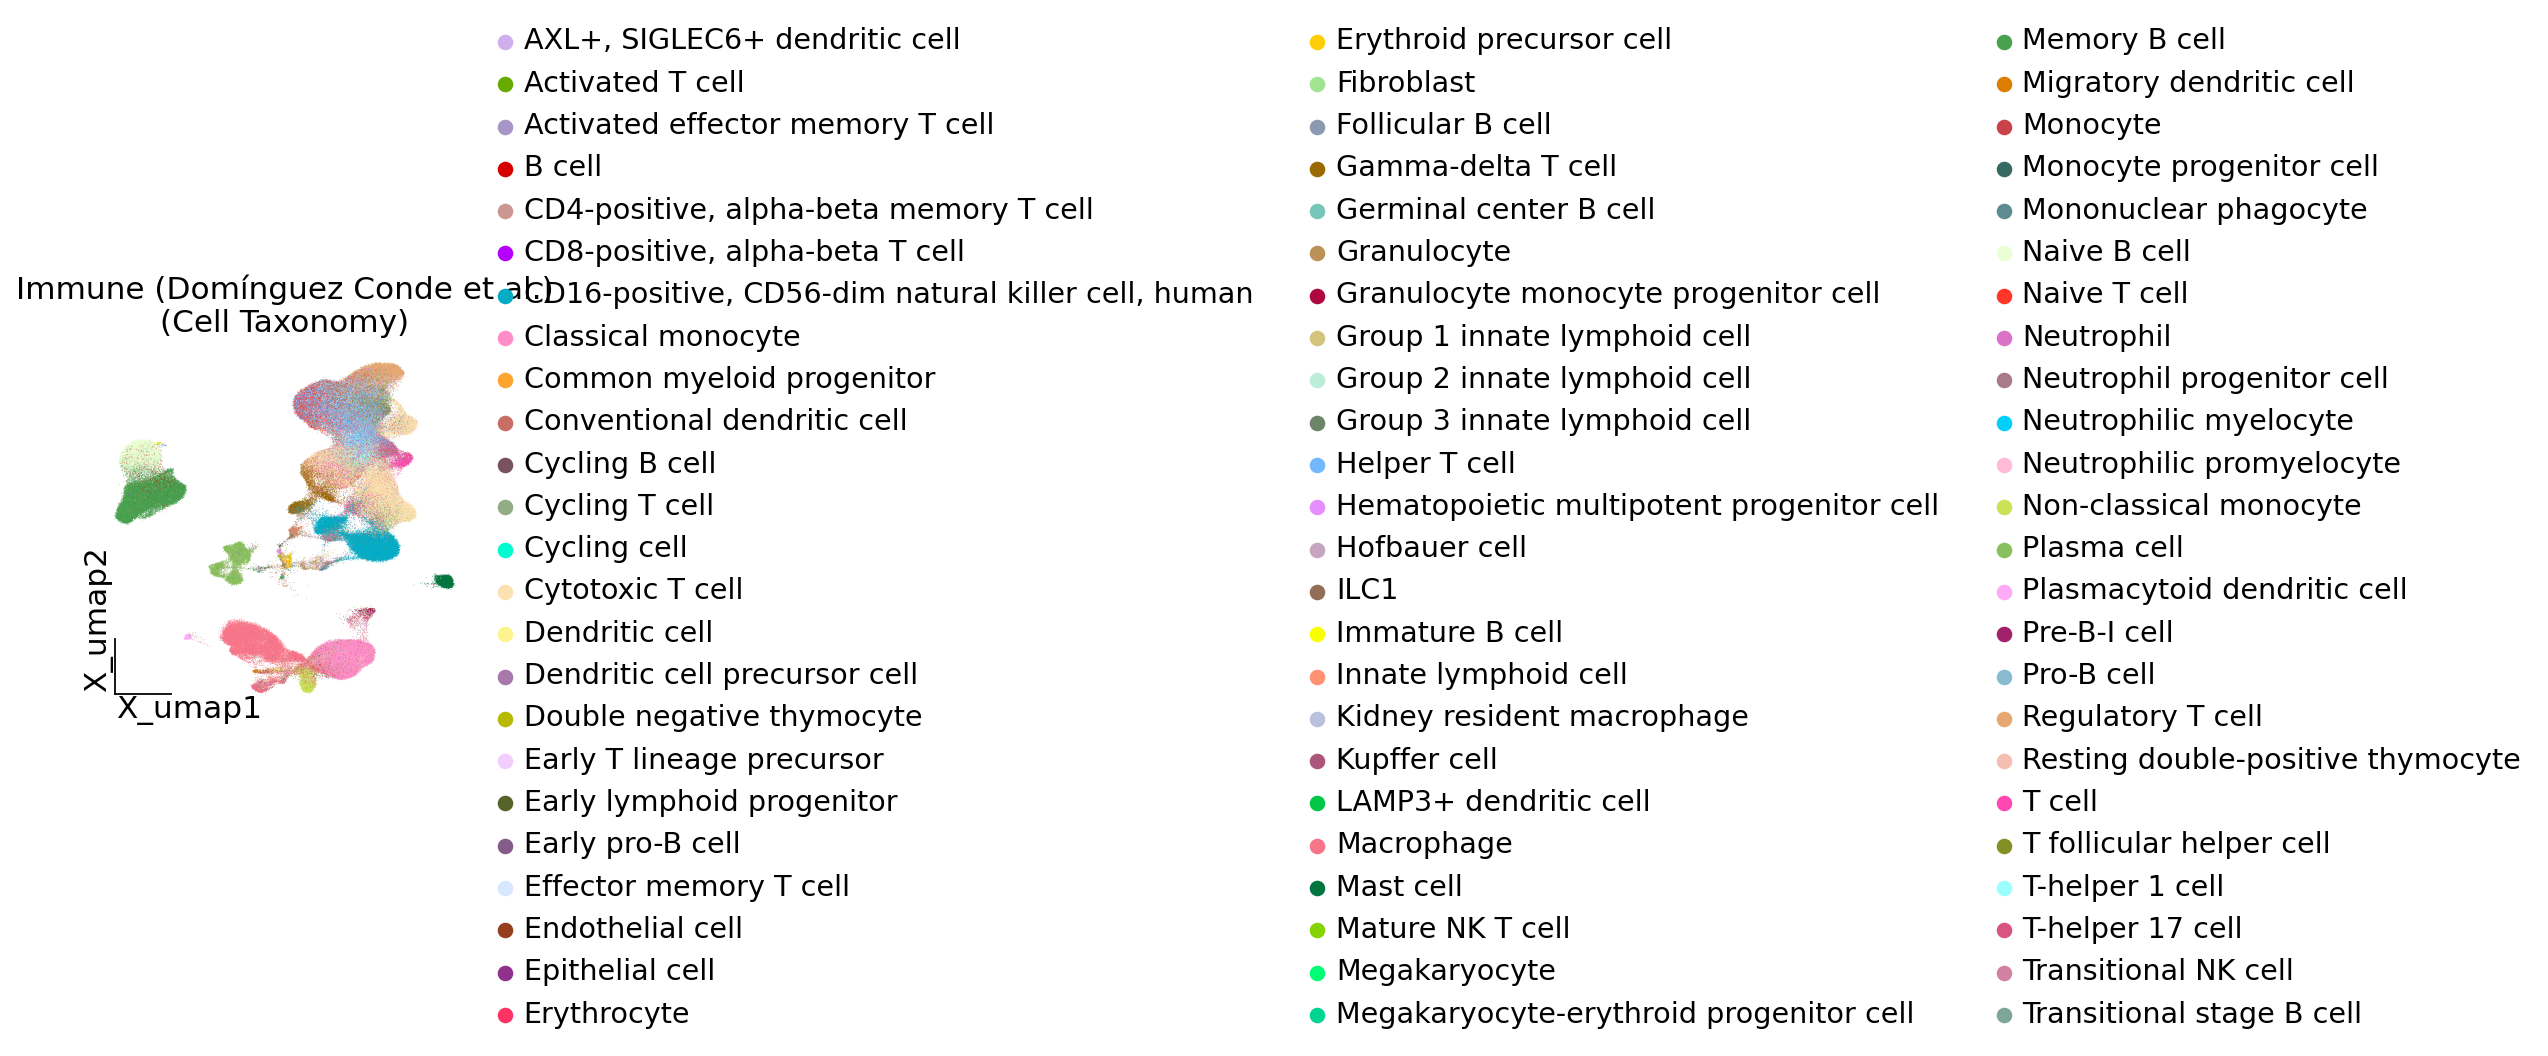

In [12]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='enhanced_cell_ontology_taxonomy_match',
    title='Immune (Domínguez Conde et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    #palette=rgba_list_to_hex(cmaps.greenorange_12.colors)+ov.pl.sc_color[11:],
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-immune-taxonomy-33.png',dpi=300,bbox_inches='tight')

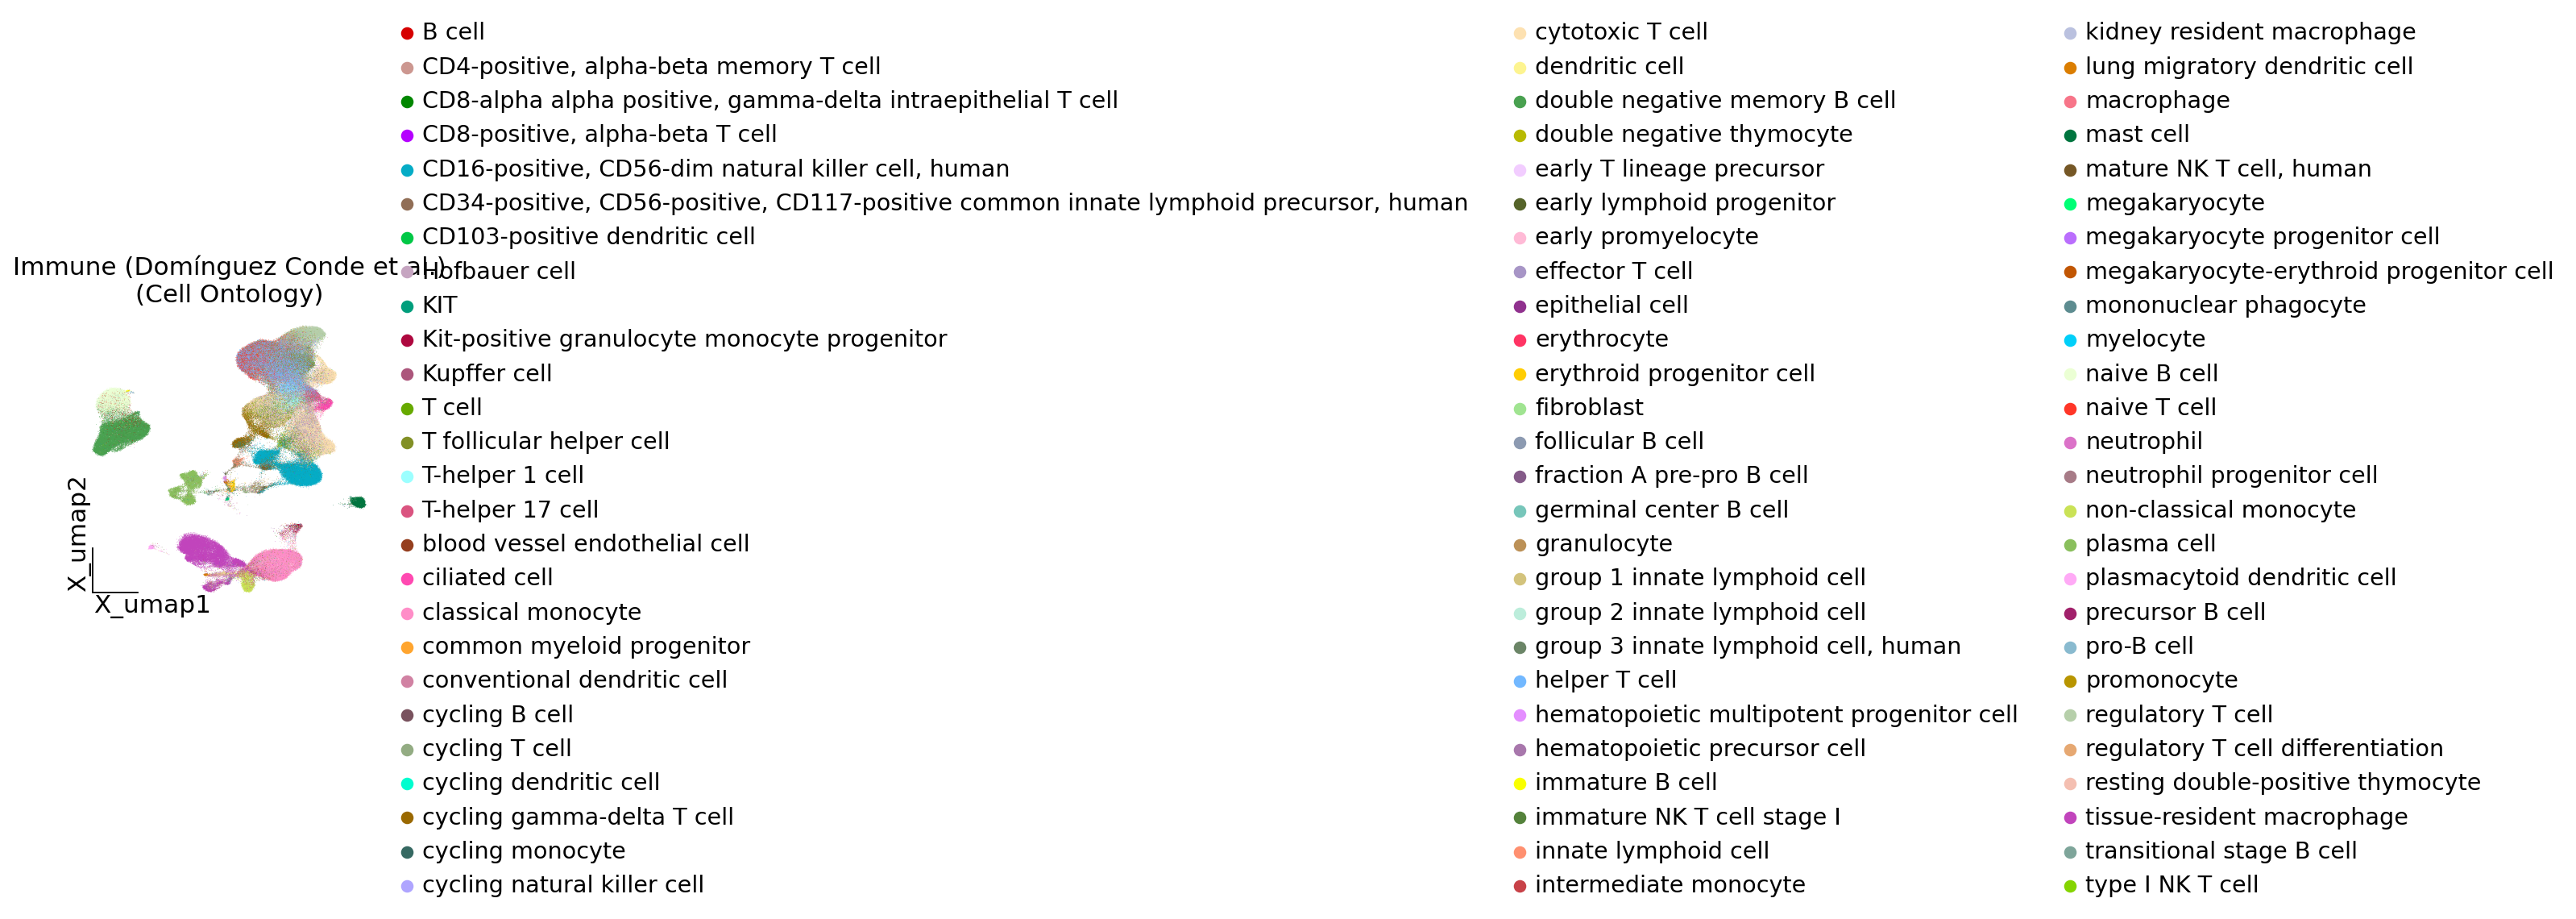

In [13]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology'

type_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'].cat.categories,
    adata.uns['Predicted_labels_CellTypist_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Immune (Domínguez Conde et al.)\n(Cell Ontology)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-immune-ontology-33.png',dpi=300,bbox_inches='tight')

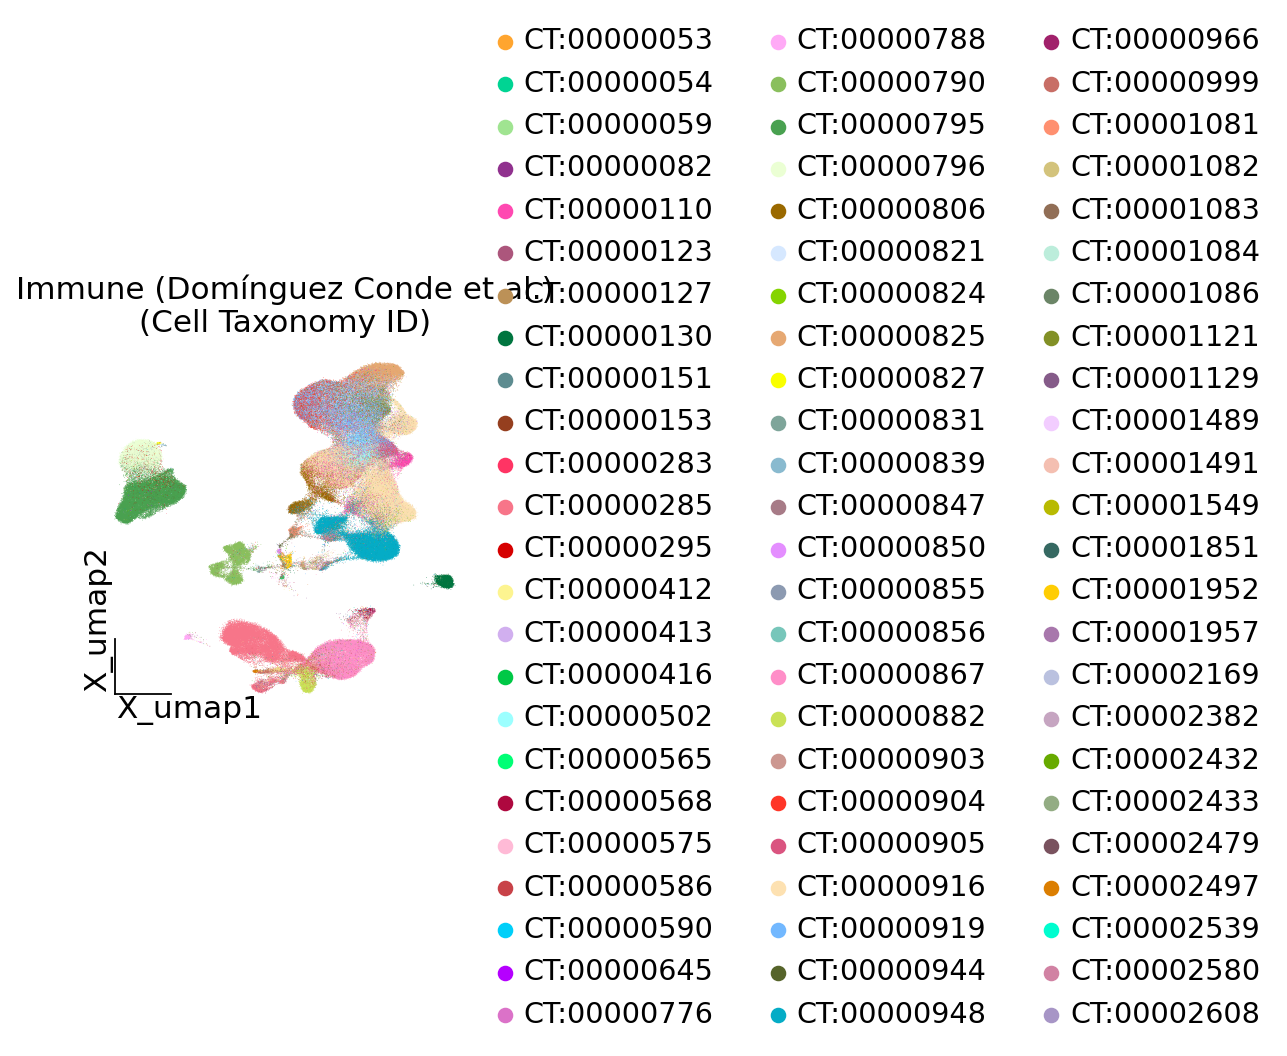

In [14]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_ct_id'

type_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'].cat.categories,
    adata.uns['Predicted_labels_CellTypist_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Immune (Domínguez Conde et al.)\n(Cell Taxonomy ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-immune-taxonomy-id-33.png',dpi=300,bbox_inches='tight')

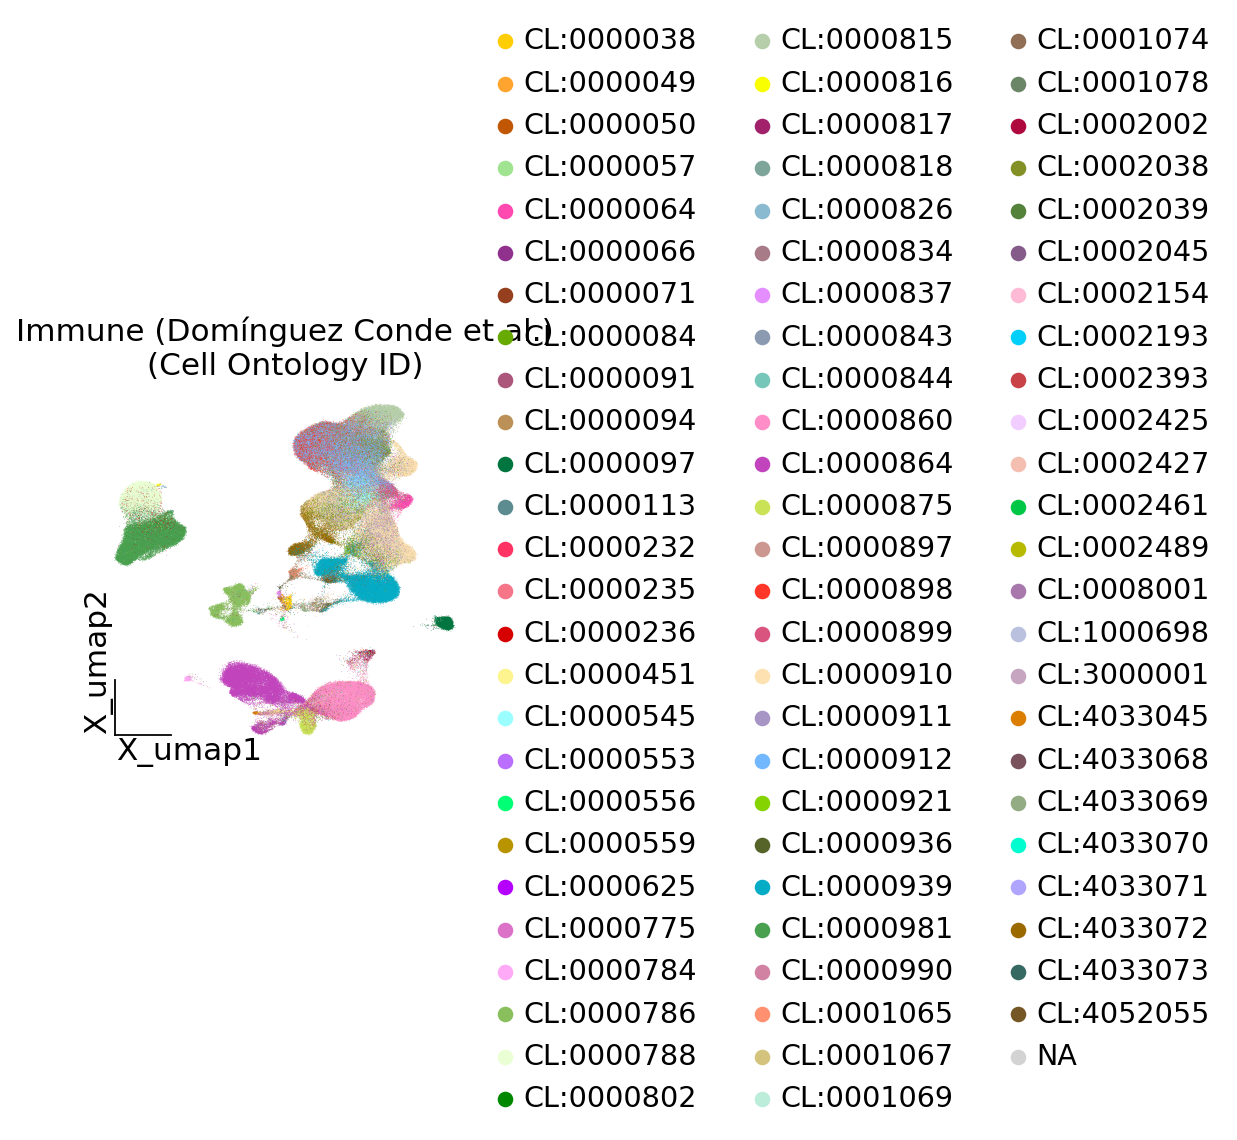

In [15]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_cl_id'

type_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'].cat.categories,
    adata.uns['Predicted_labels_CellTypist_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Immune (Domínguez Conde et al.)\n(Cell Ontology ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-immune-ontology-id-33.png',dpi=300,bbox_inches='tight')

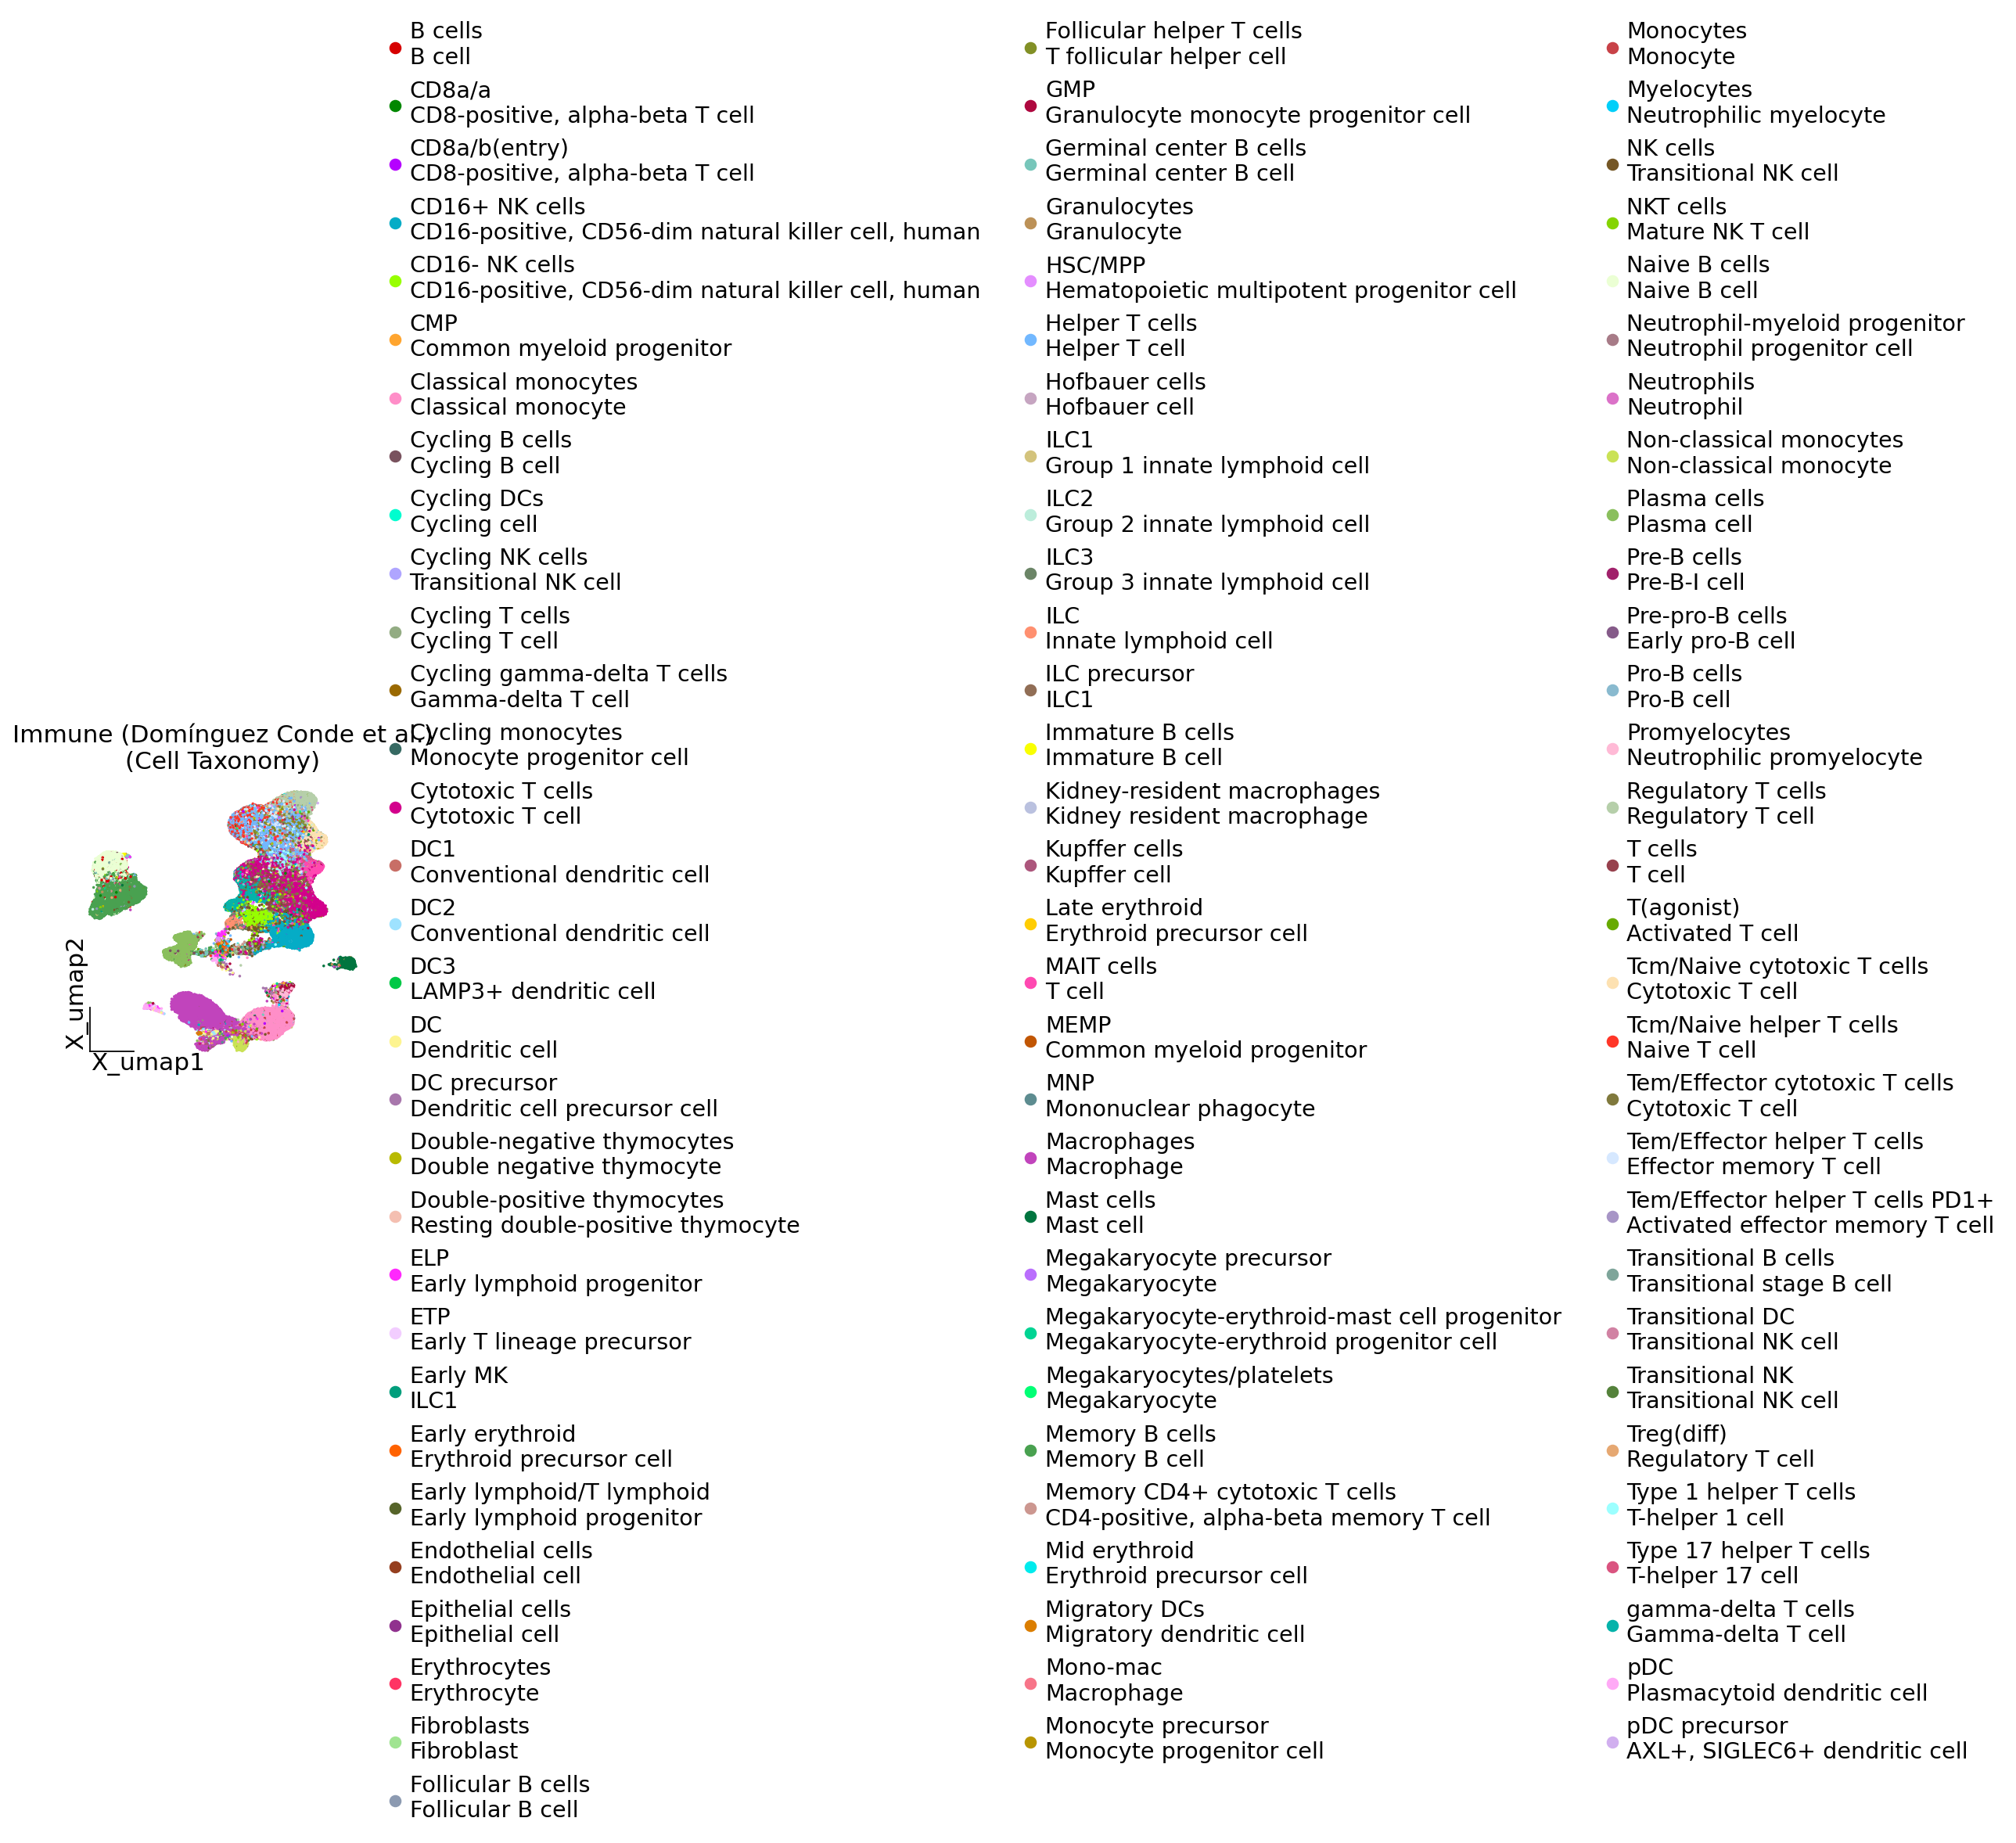

In [16]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j for i,j in zip(
    adata.obs['Predicted_labels_CellTypist'].tolist(),
    adata.obs[goal].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'].cat.categories,
    adata.uns['Predicted_labels_CellTypist_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Immune (Domínguez Conde et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-immune-Taxonomy-match-33.png',dpi=300,bbox_inches='tight')

In [ ]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j+'\n'+k for i,j,k in zip(
    adata.obs['Predicted_labels_CellTypist'].tolist(),
    adata.obs[goal].tolist(),
    adata.obs['enhanced_cell_ontology_ct_id'].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['Predicted_labels_CellTypist'].cat.categories,
    adata.uns['Predicted_labels_CellTypist_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Immune (Domínguez Conde et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-immune-Taxonomy-match-id-33.png',dpi=300,bbox_inches='tight')